# **Packages Import**

In [ ]:
import pandas            as pd
import seaborn           as sns
from sklearn.preprocessing   import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm             import SVC
from sklearn.naive_bayes     import GaussianNB
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics         import confusion_matrix,classification_report

# **1. Business & Data Understanding**

In [ ]:
df=pd.read_csv("/content/Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We notice that the dataset includes 11 variables which are:
* Loan_ID            : 614 non-null  ,  object
* Gender             : 601 non-null  ,  object
* Married            : 611 non-null  ,  object
* Dependents         : 599 non-null  ,  object
* Education          : 614 non-null  , object
* Self_Employed      : 582 non-null  ,  object
* ApplicantIncome    : 614 non-null  ,  int64  
* CoapplicantIncome  : 614 non-null  ,  float64
* LoanAmount         : 592 non-null  ,  float64
* Loan_Amount_Term   : 600 non-null  ,  float64
* Credit_History     : 564 non-null  ,  float64
* Property_Area      : 614 non-null  ,  object
* Loan_Status        : 614 non-null  ,  object

This dataset contains 614 samples partionned into two classes Y and N.
This data has several typos:
* Missed Data
* Mixed Data

# **2. Data Preparation**

## **2.1. Data Imputation**

We will check columns which contain missed data and NaN values. We will replace it using the fillna() function.
* Replace numerical missed value by 0
* Replace categorical missed value by "other"

In [ ]:
df.fillna({'Gender':'Other','Married':'Other','Dependents':'Other','Self_Employed':'Other','LoanAmount':0.0, 'Loan_Amount_Term':0.0,'Credit_History':0.0},inplace=True)

In [ ]:
df=df.drop('Loan_ID',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


df.info() alllows to check if all missed data were imputed or not

## **2.2. Data Analysis**

This step aims to understand data and extract some insights from the dataset.
It is based on the following hypothesis:
*   Which gender is more concerned by loans?
*   Are married poeple looking for loan?
*   Does intellectual level have an effect on loan demands?
*   Those who have loans in the past, are they still asking for other credits?




<Axes: xlabel='Gender', ylabel='count'>

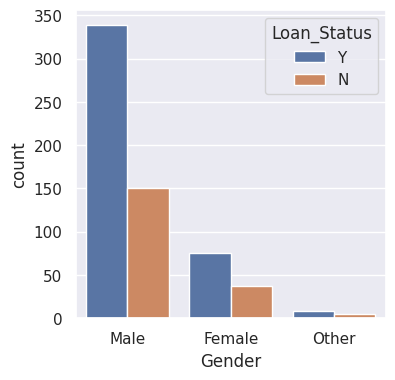

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data=df, x='Gender', hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

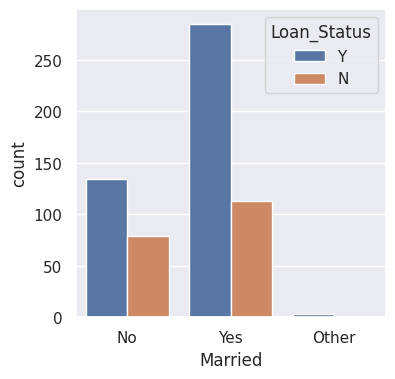

In [ ]:
sns.countplot(data=df, x='Married', hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

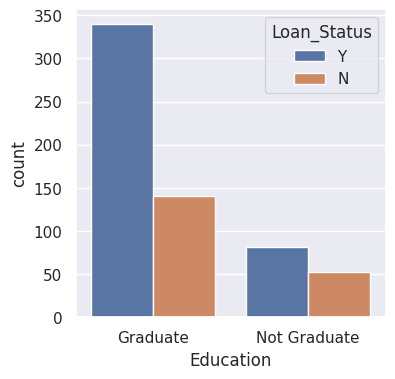

In [ ]:
sns.countplot(data=df, x='Education', hue='Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

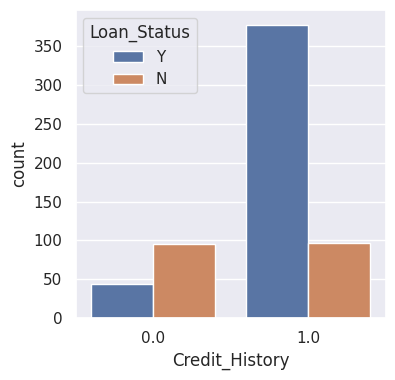

In [ ]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

## **2.3. Encoding of Data**

From df.info(), we have some columns which are categorical (Object type).

These variables have to be encoded into int64 using LabelEncoder() function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
categorcial_cols=df.select_dtypes(include=['object'])
for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"Colonnes '{column}': {unique_values}")

Colonnes 'Gender': ['Male' 'Female' 'Other']
Colonnes 'Married': ['No' 'Yes' 'Other']
Colonnes 'Dependents': ['0' '1' '2' '3+' 'Other']
Colonnes 'Education': ['Graduate' 'Not Graduate']
Colonnes 'Self_Employed': ['No' 'Yes' 'Other']
Colonnes 'Property_Area': ['Urban' 'Rural' 'Semiurban']
Colonnes 'Loan_Status': ['Y' 'N']


In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


## **2.5 Normalization**

In [ ]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,2
1,1,2,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2
3,1,2,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.38261602, -1.36840549, -0.75205987, ...,  0.31416232,
         0.54095432,  1.22329839],
       [ 0.38261602,  0.73472585,  0.14110214, ...,  0.31416232,
         0.54095432, -1.31851281],
       [ 0.38261602,  0.73472585, -0.75205987, ...,  0.31416232,
         0.54095432,  1.22329839],
       ...,
       [ 0.38261602,  0.73472585,  0.14110214, ...,  0.31416232,
         0.54095432,  1.22329839],
       [ 0.38261602,  0.73472585,  1.03426415, ...,  0.31416232,
         0.54095432,  1.22329839],
       [-1.99037625, -1.36840549, -0.75205987, ...,  0.31416232,
        -1.84858491, -0.04760721]])

## **2.4. Data Partioning**

[X_train,X_test,y_train,y_test]=train_test_split(*X,y*,**test_size=0.2**)
This function create two parititions of the dataset with a test size of 0.2:
* Train dataset (**80%** of the overall dataset)
* Test dataset  (**20%** of the overall dataset)


* X denotes the matrix of features X-> delete from df the coloumn class
* y denotes the label coloumn y-> troncate the df only on the coloumn class

In [ ]:
[X_train,X_test,y_train,y_test]=train_test_split(X,y,test_size=0.2)

* Train dataset = 80% * Number of samples (614) = 614 * 0.8
* Test  dataset = 20% * Number of samples (614) = 614 * 0.2
* A.N: Train dataset = 491  & Test  dataset = 122.8

In [ ]:
print("Train dataset size: {}/{}".format(len(X_train),len(y)))
print("Test dataset size: {}/{}".format(len(X_test),len(y)))

Train dataset size: 491/614
Test dataset size: 123/614




*   X_train: Features of train;
*   y_train: Labels of X_train;
*   X_test : Fetaures of test;
*   y_test : Labels of X_test.



# **3. Machine Learning: NB Vs SVM Vs Neural Network**

We will compare between these 3 classifiers on the same partitioned data. Let's start by the initialization of the classifier which we will compare.

In [ ]:
gnb=GaussianNB() # gnb is a naive bayes classifier
linear_svm  =SVC(kernel='linear') # linear_svm is a Linear Support Vectors
rbf_svm     =SVC(kernel='rbf')    # rbf_svm is a RBF support vectors
sigmoid_svm =SVC(kernel='sigmoid')# sigmoid support vectors
ploy_svm    =SVC(kernel='poly',degree=2) # Ploynom with degree=2 as support vectors
neural=MLPClassifier(hidden_layer_sizes=(100,20),activation='logistic',solver='adam') # neural is a neural network classification

neural=MLPClassifier parametres:
*   hidden_layer_sizes=(100,20):   4x100x20x2
*   activation='relu': activation function in all neurons is Relu(x)
*   solver='adam'    : algorithm for weights' update during the training
*   defalut value of learning rate (alph): 0.001


Now, we will move to the training process with using of the fit() function.


In [ ]:
gnb.fit(X_train,y_train) # Train Guassian NB classifier
linear_svm.fit(X_train,y_train) # Train SVM
rbf_svm.fit(X_train,y_train)
sigmoid_svm.fit(X_train,y_train)
ploy_svm.fit(X_train,y_train)
neural.fit(X_train,y_train) # Train Neural Network - finding the best weight matrix

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20))

Now, we will test the learned models!


* We will ask the model to give a prediction based on its learning
* Each Classifier will produce a prediction; y_nb,y_linear_svm,etc.



We have two types of labels:
*   y_test: true label coming from the initial dataset
*   y_nb, y_linear_svm, y_rbf_svm, y_sigmoid_svm, y_ploy_svm et y_neural: are the labels predicted by the models: naive bayes, svm with all kernels and neural network
!!! Le modèle est performant si et seulement si sa prédiction ègale aux vrais labels !!!

In [ ]:
y_nb=gnb.predict(X_test)
y_linear_svm=linear_svm.predict(X_test)
y_rbf_svm=rbf_svm.predict(X_test)
y_ploy_svm=ploy_svm.predict(X_test)
y_sigmoid_svm=sigmoid_svm.predict(X_test)
y_neural=neural.predict(X_test)

#  **4. Performance Evaluation**


In [ ]:
print ('************* Peformance Evauation of Naive Bayes **************')
print(confusion_matrix(y_test,y_nb))
print(classification_report(y_test,y_nb))
print ('************* Peformance Evauation of Linear SVM **************')
print(confusion_matrix(y_test,y_linear_svm))
print(classification_report(y_test,y_linear_svm))
print ('************* Peformance Evauation of RBF SVM **************')
print(confusion_matrix(y_test,y_rbf_svm))
print(classification_report(y_test,y_rbf_svm))
print ('************* Peformance Evauation of Sigmoid SVM **************')
print(confusion_matrix(y_test,y_sigmoid_svm))
print(classification_report(y_test,y_sigmoid_svm))
print ('************* Peformance Evauation of Polynomial (2) SVM **************')
print(confusion_matrix(y_test,y_ploy_svm))
print(classification_report(y_test,y_ploy_svm))
print ('************* Peformance Evauation of Neural Network **************')
print(confusion_matrix(y_test,y_neural))
print(classification_report(y_test,y_neural))

************* Peformance Evauation of Naive Bayes **************
[[17 17]
 [12 77]]
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        34
           1       0.82      0.87      0.84        89

    accuracy                           0.76       123
   macro avg       0.70      0.68      0.69       123
weighted avg       0.75      0.76      0.76       123

************* Peformance Evauation of Linear SVM **************
[[16 18]
 [ 8 81]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        34
           1       0.82      0.91      0.86        89

    accuracy                           0.79       123
   macro avg       0.74      0.69      0.71       123
weighted avg       0.78      0.79      0.78       123

************* Peformance Evauation of RBF SVM **************
[[14 20]
 [ 7 82]]
              precision    recall  f1-score   support

           0       0.67      0.41      0.51 

# **5. Deploiment**

In [ ]:
import pickle
file_path = 'svm_model.pickle'
pickle.dump(rbf_svm, open(file_path, "wb"))